This uses the analysed radial density profiles to obtain binodals etc. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib
plt.rcParams.update(plt.rcParamsDefault)
latex_path = '/project/fava/packages/texlive/2021/bin/x86_64-linux'
latex = os.path.join(latex_path, 'latex')
cmd_list = [latex, '--version']
cmd = ' '.join(cmd_list)

plt.rcParams['text.usetex']=True
#plt.rcParams['text.latex.unicode']=True
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update(plt.rcParamsDefault)

import pathlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager


# Setup the fonts
fonts_path = pathlib.Path.home().joinpath('fonts') # i.e. `~/fonts` (update as needed)
font_filename = 'ARIAL.TTF'
font_path = fonts_path.joinpath(font_filename)

font_manager.fontManager.addfont(str(font_path))
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.sans-serif'] = "Arial"

In [3]:
from scipy import optimize
import pickle
def fit(x, dense, dilute, shift, width):
    return 0.5 * (dense + dilute) - 0.5 * (dense - dilute) * np.tanh((2 * (x - shift)) / width)
def conc_analytic(y,x_range):

    norm_den=[np.log10(ele) for ele in y]
    #Perform the fit
    try:
        popt_dilute, pcov_dilute = optimize.curve_fit(fit, x_range,(norm_den),p0=[norm_den[0],np.mean(norm_den[-2:]),5,10])
    except RuntimeError:
        popt_dilute = np.zeros(4)
        pcov_dilute = np.zeros((4, 4))
    perr_dilute = np.sqrt(np.diag(pcov_dilute))
    
    #Save fitting parameters 
    dense_conc = 10**popt_dilute[0]
    dilute_conc= 10**popt_dilute[1]
    interface_mid = popt_dilute[2]
    interface_width = popt_dilute[3]
#     return(dilute_conc,dense_conc,interface_mid,interface_width,\
#            np.abs(dilute_conc*popt_dilute[0]*perr_dilute[0]/10/np.sqrt(200)),np.abs(dense_conc*popt_dilute[1]*perr_dilute[1]/10/np.sqrt(200)))
    
    return(dilute_conc,dense_conc,interface_mid,interface_width,\
           np.abs(perr_dilute[0]*dense_conc*np.log(10)),np.abs(perr_dilute[1]*dilute_conc*np.log(10)),
          interface_width,perr_dilute[3])

In [4]:
def unlog_values(x, dense, dilute, shift, width):
    return 10**(fit(x, np.log10(dense), np.log10(dilute), shift, width))

In [5]:
from scipy import optimize
import pickle
from scipy import special
def fit_erf(x, A, B, R, W):
#     print(math.erf((x-R)/np.sqrt(2)/W))
    return B-A*special.erf((x-R)/np.sqrt(2)/W)
def conc_analytic_erf(y,x_range):
    
    y=np.array(y)
    try:
        popt_dilute, pcov_dilute = optimize.curve_fit(fit_erf, x_range,(y),p0=[0.001,1,12,1],bounds=(0,[np.inf,np.inf,np.inf,np.inf]))
    except RuntimeError:
        popt_dilute = np.zeros(4)
        pcov_dilute = np.zeros((4, 4))
    perr_dilute = np.sqrt(np.diag(pcov_dilute))

    #Save fitting parameters 
    A= popt_dilute[0]
    B= popt_dilute[1]
    R= popt_dilute[2]
    W= popt_dilute[3]
    return(A,B,R,W)

(0.0, 51.0)

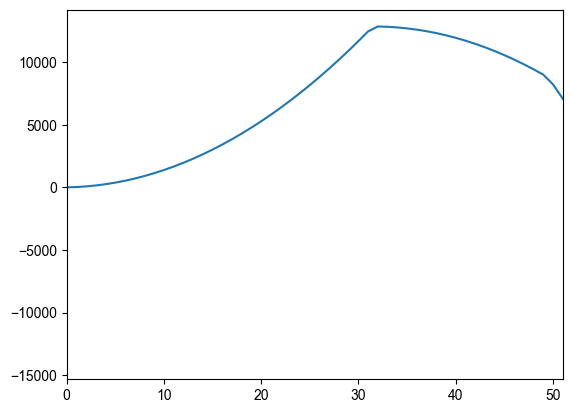

In [7]:
v_r=[4/3*np.pi*(r**3) for r in np.arange(0,33,1)]
L=64
for r in np.arange(33,51,1):
    h=r-L/2
    v_sph=4/3*np.pi*r**3
    v_outside=4*np.pi/3*h*h*(3*r-h)
    v_r.append(v_sph-v_outside)

for r in np.arange(51,67,1):
    h=r-L/2
    h2=r-50
    v_sph=4/3*np.pi*r**3
    v_outside=4*np.pi/3*h*h*(3*r-h)+2*np.pi/3*h2*h2*(3*r-h2)
    v_r.append(v_sph-v_outside)

radial_volume=[(v_r[ele+1]-v_r[ele]) for ele in range(66)]
plt.plot(radial_volume)
plt.xlim([0,51])

In [9]:
def avg_error(std_error):
    return(np.sqrt(np.sum([std_error[ele]**2 for ele in range(len(std_error))])))

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x - cen)**2 / (2 * wid**2))

In [197]:
A_r=[np.pi*r*r for r in np.arange(0,50,1)]

for r in np.arange(50,50*1.414+1,1):

    A_circle=np.pi*r*r
    A_outside=8*(1/2*r*r*np.arccos(50/r)-1/2*np.sqrt(r*r-50*50)*50)
    A_r.append(A_circle-A_outside)

radial_area_old=[(A_r[ele+1]-A_r[ele]) for ele in range(int(50*1.414))]

A_r=[np.pi*r*r for r in np.arange(0,33,1)]

for r in np.arange(33,51,1):
    Lx=32
    
    theta_x=2*np.arccos(Lx/r)
    A_segment=1/2*r*r*(theta_x-np.sin(theta_x))
    
    A_circle=np.pi*r*r
    A_outside=2*A_segment
    
    A_r.append(A_circle-A_outside)

for r in np.arange(51,75,1):
    Lx=32
    theta_x=2*np.arccos(Lx/r)
    A_segment_x=1/2*r*r*(theta_x-np.sin(theta_x))
    
    Lz=50
    theta_z=2*np.arccos(Lz/r)
    #print(theta_x,theta_z)
    A_segment_z=1/2*r*r*(theta_z-np.sin(theta_z))
    #print(r,A_circle,2*A_segment_x,2*A_segment_z)
    A_circle=np.pi*r*r
    A_outside=2*A_segment_x+2*A_segment_z
    
    A_r.append(A_circle-A_outside)
            
radial_area_new=[(A_r[ele+1]-A_r[ele]) for ele in range(58)]

In [306]:
import random

def find_width_bootstrap(r_coord_og,derivative_radial_density):
    
    dPhi_og=[np.abs(ele) for ele in derivative_radial_density]
    
    width=[]
    c_max=4
    
    for trials in range(1000):
        
        rand_ind=random.randrange(len(dPhi_og))
        
        dPhi=dPhi_og[:rand_ind]+dPhi_og[rand_ind+1:]
        r_coord=r_coord_og[:rand_ind]+r_coord_og[rand_ind+1:]
                         
        inc_array,dec_array=[],[]
        for kl in range(len(r_coord)-10):
            flag=0
            for counter in range(c_max):
                if((dPhi[kl+counter+1]>dPhi[kl+counter]) ):
                    flag+=1
            if(flag==(c_max)):
                inc_array.append(r_coord[kl])
        
        for kl in range(len(r_coord)-10):
            flag=0
            for counter in range(c_max):
                if((dPhi[kl-counter-1]>dPhi[kl-counter])):
                    flag+=1
            if(flag==(c_max)):
                dec_array.append(r_coord[kl])
        if((dec_array!=[]) and (inc_array!=[])):
            width.append(np.max(dec_array)-np.min(inc_array))
    
    return(np.mean(width),np.std(width))

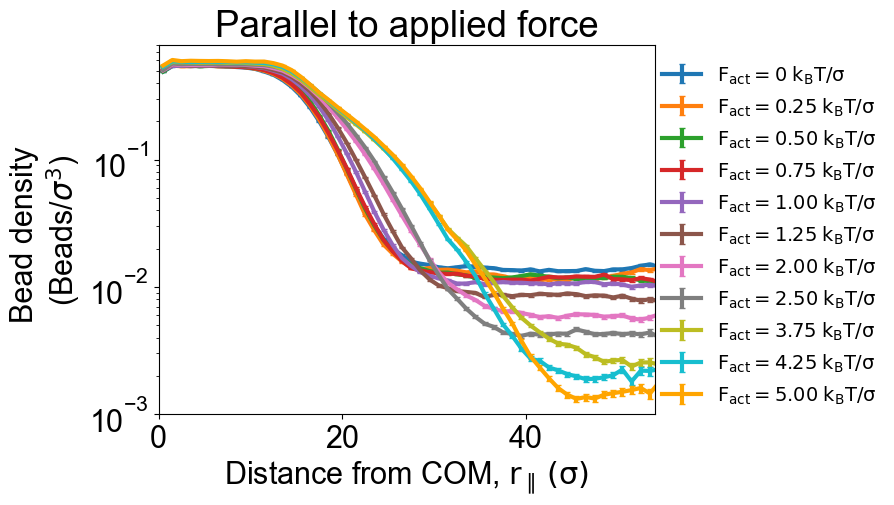

In [399]:
plt.rcParams.update({'font.size': 22})
color_wa= plt.rcParams['axes.prop_cycle'].by_key()['color']
color_wa.append('orange')
color_wa.append('grey')

passive_fraction=[0,0.05,0.10,0.25]

p_wa=-1
force=[0,0.25,0.5,0.75,1,1.25,2.5,3.75,4.25,5,10]
label_wa=[r'$\mathrm{F_{act}=0 \;k_BT/\sigma}$',r'$\mathrm{F_{act}=0.25 \;k_BT/\sigma}$',
          r'$\mathrm{F_{act}=0.50 \;k_BT/\sigma}$',r'$\mathrm{F_{act}=0.75 \;k_BT/\sigma}$',
          r'$\mathrm{F_{act}=1.00 \;k_BT/\sigma}$',r'$\mathrm{F_{act}=1.25 \;k_BT/\sigma}$',
          r'$\mathrm{F_{act}=2.00 \;k_BT/\sigma}$',r'$\mathrm{F_{act}=2.50 \;k_BT/\sigma}$',
          r'$\mathrm{F_{act}=3.75 \;k_BT/\sigma}$',r'$\mathrm{F_{act}=4.25 \;k_BT/\sigma}$',
          r'$\mathrm{F_{act}=5.00 \;k_BT/\sigma}$',r'$\mathrm{F_{act}=10 \;k_BT/\sigma}$']
bins_r=range(0,67)
dist_r=[(bins_r[ele]+bins_r[ele+1])/2 for ele in range(len(bins_r)-1)]
dense_act,dil_act,dense_act_std,dil_act_std=[[] for kl in range(4)],[[] for kl in range(4)],[[] for kl in range(4)],[[] for kl in range(4)]
F_act=[[] for kl in range(4)]

width_act,width_act_err=[[] for kl in range(4)],[[] for kl in range(4)]

# Radius_condensate,width_R=[],[]
f_passive=[0,0.05,0.10,0.25]
width_f_parallel,width_error_f_parallel=[],[]
for frac_wa in ["../f_100_damp_0.5/"]:
    
    p_wa+=1
    jk=0

    for new_dir in ["Fact_0/","Fact_0.25/","Fact_0.5/","Fact_0.75/","Fact_1/","Fact_1.25/","Fact_2.00/",\
                   "Fact_2.5/","Fact_3.75/","Fact_4.25/","Fact_5/"]:
 
        if(os.path.isfile(frac_wa+new_dir+"slices_from_COC_thick_1/dense_phase_radial_Y_32.npy")):
            #print(frac_wa+new_dir)
            F_act[p_wa].append(force[jk])
            
            density_radial_Y=np.load(frac_wa+new_dir+"slices_from_COC_thick_1/dense_phase_radial_Y_32.npy")
            density_radial_Err_Y=np.load(frac_wa+new_dir+"slices_from_COC_thick_1/Std_dev_dense_phase_radial_Y_32.npy")
            
            density_radial_X=np.load(frac_wa+new_dir+"slices_from_COC_thick_1/dense_phase_radial_X_32.npy")
            density_radial_Err_X=np.load(frac_wa+new_dir+"slices_from_COC_thick_1/Std_dev_dense_phase_radial_X_32.npy")
            
            label_index=jk
            label_new=label_wa[label_index]
            plt.errorbar(dist_r[:57],[(density_radial_X[ele]+density_radial_Y[ele])/2*radial_area_old[ele]/radial_area_new[ele] for ele in range(57)],
                         
            [np.sqrt(density_radial_Err_X[ele]**2+density_radial_Err_Y[ele]**2)/2*radial_area_old[ele]/radial_area_new[ele] for ele in range(57)]
                     ,label=label_wa[label_index],lw=3,capsize=2,ls='-',color=color_wa[label_index])
            
            density_radial=[(density_radial_X[ele]+density_radial_Y[ele])/2*radial_area_old[ele]/radial_area_new[ele] for ele in range(57)]
            derivative=np.gradient(density_radial[:57],dist_r[:57])
            pos_derivative=[np.abs(ele) for ele in derivative]
            
            w,w_err=find_width_bootstrap(dist_r[:57],pos_derivative[:]/np.max(pos_derivative))
            width_f_parallel.append(w)
            width_error_f_parallel.append(w_err)
            #print(w,w_err)
            #plt.axvspan(start, end, facecolor='g', alpha=0.5)
            
        jk+=1
    plt.legend(loc=(1,0.001),frameon=False,fontsize=14,ncols=1)    
    plt.yscale('log')
    plt.xlim([0,54])
    plt.ylim([1e-3,0.8])
    plt.ylabel("Bead density \n(Beads/${\sigma}^3$)")
    plt.xlabel("Distance from COM, "+r'$\mathrm{ r_\parallel \,(\sigma)}$')
    
    #title_wa=r'$\mathrm{f_{passive}}=$'+"{:.02f}".format(f_passive[p_wa])
    #plt.title(title_wa)
    plt.title('Parallel to applied force')
    plt.savefig("Figures/Parallel_2D_Radial_density_{:s}.pdf",bbox_inches='tight')
    plt.show()

22.02 0.30594117081556704
25.045 0.36190468358395145
21.336 1.1692322267197395
20.188 0.8903123047560334
21.033 0.17863650242881496
25.514 1.5961841998967412
19.053 0.4291747895671412
17.044 0.2050950998927083
17.079 0.45690152111806326
15.26 0.8968834929911466
15.185 0.8937421328325078


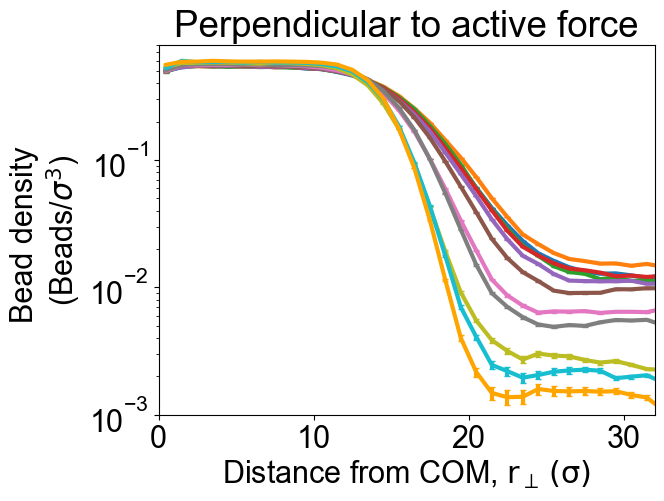

In [400]:
plt.rcParams.update({'font.size': 22})
color_wa= plt.rcParams['axes.prop_cycle'].by_key()['color']
color_wa.append('orange')
color_wa.append('grey')

passive_fraction=[0,0.05,0.10,0.25]

p_wa=-1
force=[0,0.25,0.5,0.75,1,1.25,2.5,3.75,4.25,5,10]

bins_r=range(0,67)
dist_r=[(bins_r[ele]+bins_r[ele+1])/2 for ele in range(len(bins_r)-1)]
dense_act,dil_act,dense_act_std,dil_act_std=[[] for kl in range(4)],[[] for kl in range(4)],[[] for kl in range(4)],[[] for kl in range(4)]
F_act=[[] for kl in range(4)]

width_act,width_act_err=[[] for kl in range(4)],[[] for kl in range(4)]

# Radius_condensate,width_R=[],[]
f_passive=[0,0.05,0.10,0.25]
width_f_perp,width_error_f_perp=[],[]
for frac_wa in ["../f_100_damp_0.5/"]:
    
    p_wa+=1
    jk=0

    for new_dir in ["Fact_0/","Fact_0.25/","Fact_0.5/","Fact_0.75/","Fact_1/","Fact_1.25/","Fact_2.00/",\
                   "Fact_2.5/","Fact_3.75/","Fact_4.25/","Fact_5/"]:
        
        F_act[p_wa].append(force[jk])

        density_radial=np.load(frac_wa+new_dir+"slices_from_COC_thick_1/dense_phase_radial_z_50.npy")
        density_radia_Err=np.load(frac_wa+new_dir+"slices_from_COC_thick_1/dense_phase_radial_z_50.npy")

        label_index=jk
        label_new=label_wa[label_index]
        plt.errorbar(dist_r[:45],density_radial[:45],density_radial_Err[:45]
                 ,label=label_wa[label_index],lw=3,capsize=2,ls='-',color=color_wa[label_index])

        derivative=np.gradient(density_radial[:45],dist_r[:45])
        pos_derivative=[np.abs(ele) for ele in derivative]

        w,error=find_width_bootstrap(dist_r[:45],pos_derivative[:]/np.max(pos_derivative))
        width_f_perp.append(w)
        width_error_f_perp.append(error)
        print(w,error)

             
        jk+=1
    #plt.legend(loc=(1,0.001),frameon=False,fontsize=14,ncols=1)    
    plt.yscale('log')

    plt.xlim([0,32])
    plt.ylim([1e-3,0.8])
    plt.ylabel("Bead density \n(Beads/${\sigma}^3$)")
    plt.xlabel("Distance from COM, "+r'$\mathrm{ r_\perp \,(\sigma)}$')
    
    #title_wa=r'$\mathrm{f_{passive}}=$'+"{:.02f}".format(f_passive[p_wa])
    plt.title("Perpendicular to active force")
    
    plt.savefig("Figures/Perpendicular_Radial_density_{:s}.pdf",bbox_inches='tight')
    plt.show()

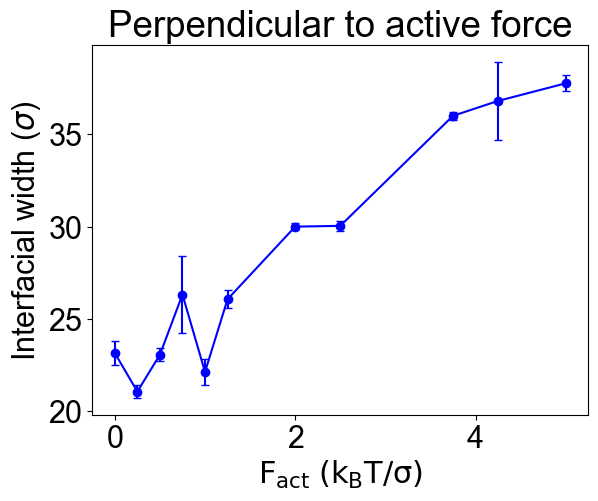

In [326]:
plt.errorbar([0,0.25,0.5,0.75,1,1.25,2,2.5,3.75,4.25,5],width_f,width_error_f,capsize=3,marker='o',color='b')
plt.xlabel(r'$\mathrm{F_{act} \;(k_BT/{\sigma})}$')
plt.ylabel(("Interfacial width ($\sigma$)"))
plt.title("Perpendicular to active force")
plt.savefig("Figures/Perpendicular_width.pdf",bbox_inches='tight')

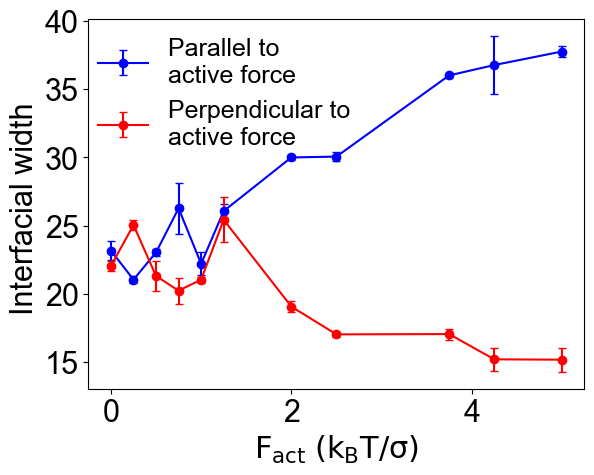

In [366]:
plt.errorbar([0,0.25,0.5,0.75,1,1.25,2,2.5,3.75,4.25,5],width_f_parallel,width_error_f_parallel,
             label='Parallel to \nactive force',capsize=3,marker='o',color='b')

plt.errorbar([0,0.25,0.5,0.75,1,1.25,2,2.5,3.75,4.25,5],width_f_perp,width_error_f_perp,
             label='Perpendicular to \nactive force',capsize=3,marker='o',color='r')

plt.xlabel(r'$\mathrm{F_{act} \;(k_BT/{\sigma})}$')
plt.ylabel(("Interfacial width "))
plt.legend(loc=(0,0.62),frameon=False,fontsize=18)
#plt.ylim([12,45])
plt.savefig("Figures/Parallel_Perpendicular_width.pdf",bbox_inches='tight')

22

In [3]:
def cumulative_distribution_function(data):
    # Sort the data in ascending order
    sorted_data = np.sort(data)

    # Calculate the cumulative probabilities
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    return sorted_data, cdf_values

Fact_0/ 5.997767639893184 5.026494788564283
Fact_1/ 6.8415983361639885 5.937394068505355
Fact_2.5/ 11.15818891569293 10.582416137759816
Fact_5/ 20.48555445750302 20.196018208040545


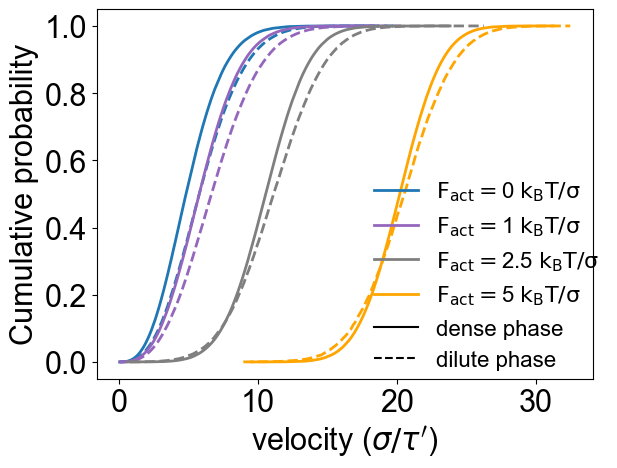

In [5]:
color_wa= plt.rcParams['axes.prop_cycle'].by_key()['color']
color_wa.append('orange')
color_wa.append('grey')
plt.rcParams.update({'font.size': 22})
title_wa=[r'$\mathrm{f_{passive}}$=0.05',r'$\mathrm{f_{passive}}$=0.10',r'$\mathrm{f_{passive}}$=0.25']

label_wa=[r'$\mathrm{F_{act}=0}$',r'$\mathrm{F_{act}=1}$',r'$\mathrm{F_{act}=2.5}$',r'$\mathrm{F_{act}=5}$']
F=[0,1,2.5,5]
label_index=[0,4,7,10]
#for frac_wa in ["f_100_damp_0.5/","f_95_damp_0.5/","f_90_damp_0.5/","f_75_damp_0.5/"]:
for frac_wa in ["../f_100_damp_0.5/"]:
    kl=0
    avg_passive,std_passive=[],[]
    for new_dir in ["Fact_0/","Fact_1/","Fact_2.5/","Fact_5/"]:
        
        v_dense=np.load(frac_wa+new_dir+"v_dense.npy")
        v_dilute=np.load(frac_wa+new_dir+"v_dilute.npy")
        print(new_dir,np.mean(v_dilute),np.mean(v_dense))
        
        label_wa=r'$\mathrm{F_{act}=}$'+str(F[kl])+r' $\mathrm{k_BT/\sigma}$'
        sorted_data, cdf_values = cumulative_distribution_function(v_dense)
        plt.plot(sorted_data, cdf_values, ls='-',lw=2,label=label_wa,color=color_wa[label_index[kl]])
        
        sorted_data, cdf_values = cumulative_distribution_function(v_dilute)
        plt.plot(sorted_data, cdf_values, ls='--',lw=2,color=color_wa[label_index[kl]])

        kl+=1
plt.plot([],[],label='dense phase',ls='-',color='k')
plt.plot([],[],label='dilute phase',ls='--',color='k')
        
plt.ylabel('Cumulative probability')
plt.xlabel(r'velocity ($\sigma/ {\tau}^\prime $)')
    
plt.legend(loc=(0.54,0.0),frameon=False,fontsize=16)
#plt.savefig("Figures/Velocity_CDF.pdf",bbox_inches='tight')

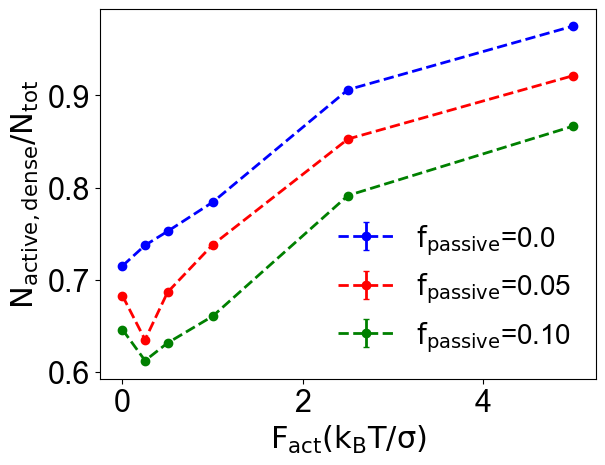

In [11]:
color_wa=['b','r','g','grey']
plt.rcParams.update({'font.size': 22})
title_wa=[r'$\mathrm{f_{passive}}$=0.0',r'$\mathrm{f_{passive}}$=0.05',r'$\mathrm{f_{passive}}$=0.10',r'$\mathrm{f_{passive}}$=0.25']

label_wa=[r'$\mathrm{F_{act}=0}$',r'$\mathrm{F_{act}=1}$',r'$\mathrm{F_{act}=2.5}$',r'$\mathrm{F_{act}=5}$']
kl=0
for frac_wa in ["f_100_damp_0.5/","f_95_damp_0.5/","f_90_damp_0.5/"]:
    
    passive_avg,fraction_passive_avg,Dense_avg,Dense_err,passive_err=[],[],[],[],[]
    active_avg,active_err=[],[]
    for new_dir in ["Fact_0/","Fact_0.25/","Fact_0.5/","Fact_1/","Fact_2.5/","Fact_5/"]:
        
        passive_dense_chains=np.load(frac_wa+new_dir+"passive_dense_chains.npy")
        Total_dense_chains=np.load(frac_wa+new_dir+"Total_dense_chains.npy")
        
        active_chains=[-passive_dense_chains[ele]+Total_dense_chains[ele] for ele in range(len(Total_dense_chains))]
        
        
        
        active_avg.append(np.mean(active_chains)/650)
        
        active_err.append(np.std(active_chains)/650/np.sqrt(len(active_chains)))
        
    plt.errorbar([0,0.25,0.5,1,2.5,5],active_avg,active_err,marker='o',ls='--',lw=2,capsize=2,label=title_wa[kl],color=color_wa[kl])
    
    plt.legend(fontsize=20,loc='lower right',frameon=False)

    plt.ylabel(r'$\mathrm {N_{active,dense}/N_{tot}}$',fontsize=22)
    
    plt.xlabel(r'$\mathrm {F_{act}(k_BT/ \sigma)}$',fontsize=22)

    kl+=1
#plt.title(r'$\mathrm{\epsilon=0.40 \; k_BT}$')
plt.savefig("Figures_3_25_2024/N_chains_active_f_passive.pdf",bbox_inches='tight')
plt.show()

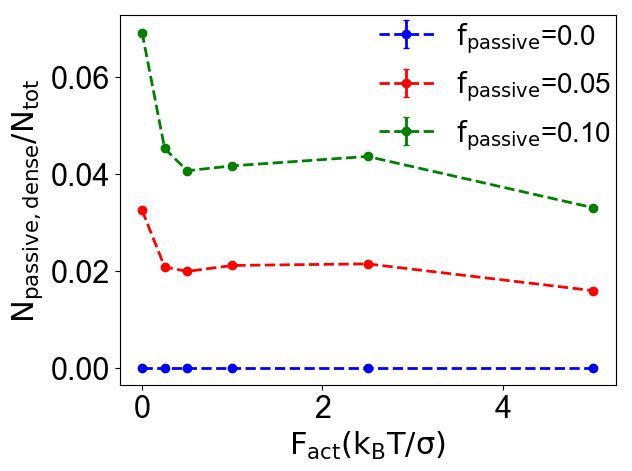

In [13]:
color_wa=['b','r','g','grey']
plt.rcParams.update({'font.size': 22})
title_wa=[r'$\mathrm{f_{passive}}$=0.0',r'$\mathrm{f_{passive}}$=0.05',r'$\mathrm{f_{passive}}$=0.10',r'$\mathrm{f_{passive}}$=0.25']

label_wa=[r'$\mathrm{F_{act}=0}$',r'$\mathrm{F_{act}=1}$',r'$\mathrm{F_{act}=2.5}$',r'$\mathrm{F_{act}=5}$']
kl=0
for frac_wa in ["f_100_damp_0.5/","f_95_damp_0.5/","f_90_damp_0.5/"]:
    
    passive_avg,fraction_passive_avg,Dense_avg,Dense_err,passive_err=[],[],[],[],[]
    for new_dir in ["Fact_0/","Fact_0.25/","Fact_0.5/","Fact_1/","Fact_2.5/","Fact_5/"]:
        
        passive_dense_chains=np.load(frac_wa+new_dir+"passive_dense_chains.npy")
        Total_dense_chains=np.load(frac_wa+new_dir+"Total_dense_chains.npy")
        
        fraction_passive=[passive_dense_chains[ele]/Total_dense_chains[ele] for ele in range(len(Total_dense_chains))]
        
        fraction_passive_avg.append(np.mean(fraction_passive))
        passive_avg.append(np.mean(passive_dense_chains)/650)
        passive_err.append(np.std(passive_dense_chains)/650/np.sqrt(len(passive_dense_chains)))
        
                
        Dense_avg.append(np.mean(Total_dense_chains/650))
        Dense_err.append(np.std(Total_dense_chains/650)/np.sqrt(len(Total_dense_chains)))
        
    plt.errorbar([0,0.25,0.5,1,2.5,5],passive_avg,passive_err,marker='o',ls='--',lw=2,capsize=2,
                 color=color_wa[kl],label=title_wa[kl])
    
    plt.legend(fontsize=20,loc=(0.5,0.6),frameon=False)

    plt.ylabel(r'$\mathrm {N_{passive,dense}/N_{tot}}$',fontsize=22)
    
    plt.xlabel(r'$\mathrm {F_{act}(k_BT/ \sigma)}$',fontsize=22)

    kl+=1
#plt.title(r'$\mathrm{\epsilon=0.40 \; k_BT}$')
plt.savefig("Figures_3_25_2024/N_chains_f_passive.pdf",bbox_inches='tight')
plt.show()

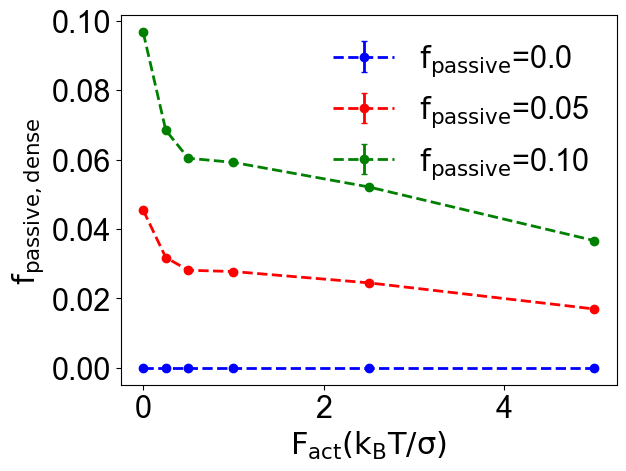

In [202]:
color_wa=['b','r','g','grey']
plt.rcParams.update({'font.size': 22})
title_wa=[r'$\mathrm{f_{passive}}$=0.0',r'$\mathrm{f_{passive}}$=0.05',r'$\mathrm{f_{passive}}$=0.10',r'$\mathrm{f_{passive}}$=0.25']

label_wa=[r'$\mathrm{F_{act}=0}$',r'$\mathrm{F_{act}=1}$',r'$\mathrm{F_{act}=2.5}$',r'$\mathrm{F_{act}=5}$']
kl=0
for frac_wa in ["f_100_damp_0.5/","f_95_damp_0.5/","f_90_damp_0.5/"]:
    
    passive_avg,fraction_passive_avg,fraction_passive_err,Dense_avg,Dense_err,passive_err=[],[],[],[],[],[]
    for new_dir in ["Fact_0/","Fact_0.25/","Fact_0.5/","Fact_1/","Fact_2.5/","Fact_5/"]:
        
        passive_dense_chains=np.load(frac_wa+new_dir+"passive_dense_chains.npy")
        Total_dense_chains=np.load(frac_wa+new_dir+"Total_dense_chains.npy")
        
        fraction_passive=[passive_dense_chains[ele]/Total_dense_chains[ele] for ele in range(len(Total_dense_chains))]
        
        fraction_passive_avg.append(np.mean(fraction_passive))
        fraction_passive_err.append(np.std(fraction_passive)/np.sqrt(len(fraction_passive)))
        passive_avg.append(np.mean(passive_dense_chains))
        passive_err.append(np.std(passive_dense_chains))
        
        Dense_avg.append(np.mean(Total_dense_chains))
        Dense_err.append(np.std(Total_dense_chains))
        
    #plt.errorbar([0,0.25,0.5,1,2.5,5],passive_avg,passive_err,marker='o',ls='--',lw=2,capsize=2,label=title_wa[kl])
    
    plt.errorbar([0,0.25,0.5,1,2.5,5],fraction_passive_avg,fraction_passive_err,marker='o',ls='--',lw=2,
                 capsize=2,label=title_wa[kl],color=color_wa[kl])
    
    plt.legend(fontsize=22,frameon=False)

    plt.ylabel(r'$\mathrm {f_{passive,dense}}$',fontsize=22)
    
    plt.xlabel(r'$\mathrm {F_{act}(k_BT/ \sigma)}$',fontsize=22)

    kl+=1
#plt.title(r'$\mathrm{\epsilon=0.40 \; k_BT}$')
plt.savefig("Figures_3_25_2024/f_passive_dense_f_passive.pdf",bbox_inches='tight')
plt.show()

In [66]:
Total_dense_chains

array([584., 590., 584., ..., 578., 572., 574.])

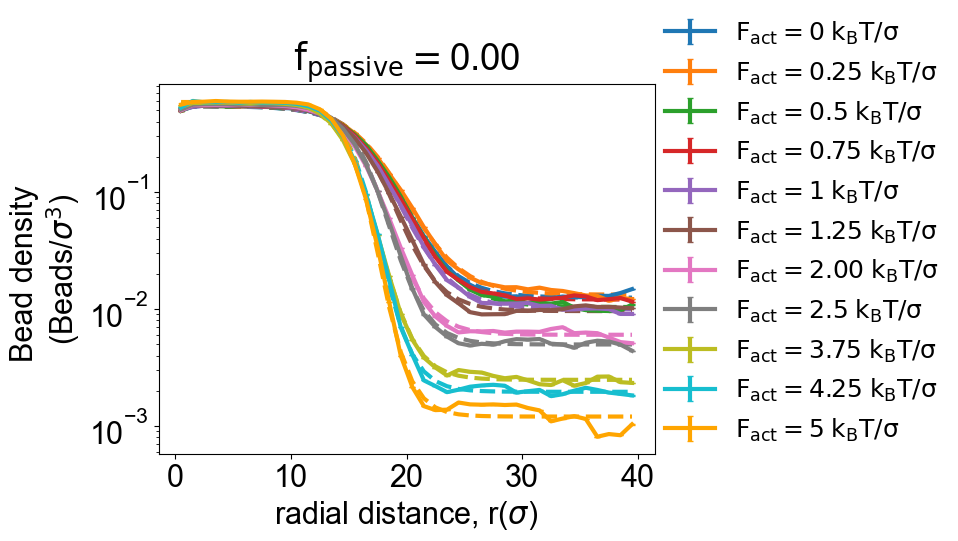

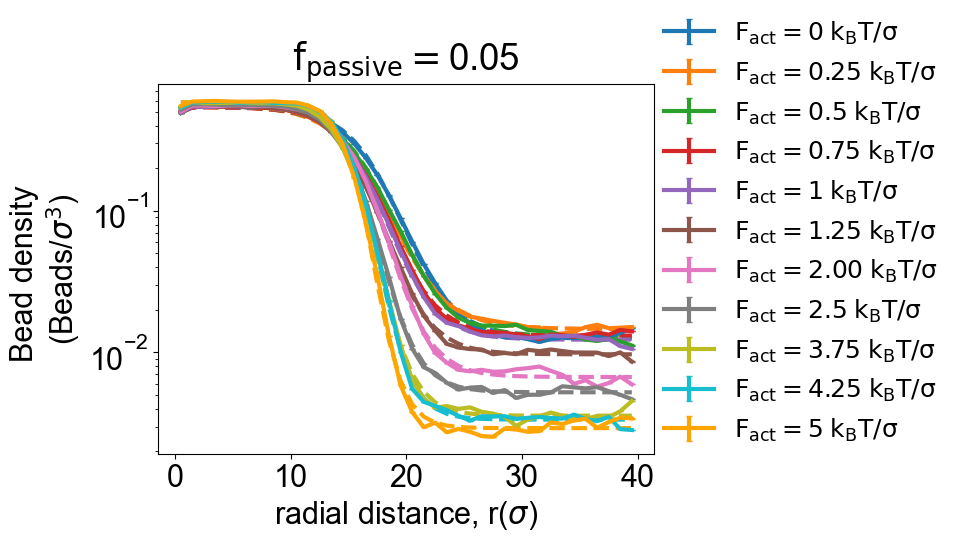

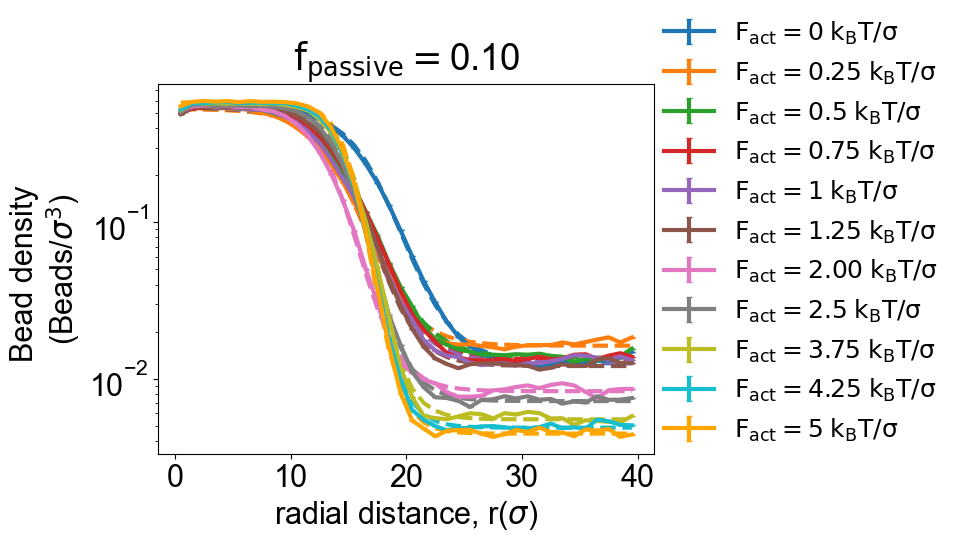

In [131]:
plt.rcParams.update({'font.size': 22})
color_wa= plt.rcParams['axes.prop_cycle'].by_key()['color']
color_wa.append('orange')
color_wa.append('grey')

passive_fraction=[0,0.05,0.10,0.25]

p_wa=-1
force=[0,0.25,0.5,0.75,1,1.25,2,2.5,3.75,4.25,5,10]
label_wa=[r'$\mathrm{F_{act}=0 \;k_BT/\sigma}$',r'$\mathrm{F_{act}=0.25 \;k_BT/\sigma}$',
          r'$\mathrm{F_{act}=0.5 \;k_BT/\sigma}$',r'$\mathrm{F_{act}=0.75 \;k_BT/\sigma}$',
          r'$\mathrm{F_{act}=1 \;k_BT/\sigma}$',r'$\mathrm{F_{act}=1.25 \;k_BT/\sigma}$',
          r'$\mathrm{F_{act}=2.00 \;k_BT/\sigma}$',r'$\mathrm{F_{act}=2.5 \;k_BT/\sigma}$',
          r'$\mathrm{F_{act}=3.75 \;k_BT/\sigma}$',r'$\mathrm{F_{act}=4.25 \;k_BT/\sigma}$',
          r'$\mathrm{F_{act}=5 \;k_BT/\sigma}$',r'$\mathrm{F_{act}=10 \;k_BT/\sigma}$']
bins_r=range(0,41)
dense_act,dil_act,dense_act_std,dil_act_std=[[] for kl in range(4)],[[] for kl in range(4)],[[] for kl in range(4)],[[] for kl in range(4)]
F_act=[[] for kl in range(4)]
width_act,width_act_err=[[] for kl in range(4)],[[] for kl in range(4)]
# Radius_condensate,width_R=[],[]
f_passive=[0,0.05,0.10,0.25]

for frac_wa in ["f_100_damp_0.5/","f_95_damp_0.5/","f_90_damp_0.5/"]:
    
    p_wa+=1
    jk=0

    for new_dir in ["Fact_0/","Fact_0.25/", "Fact_0.5/","Fact_0.75/","Fact_1/","Fact_1.25/","Fact_2.00/",\
                   "Fact_2.5/","Fact_3.75/","Fact_4.25/","Fact_5/"]:
        
        
        A,A_err=[],[]

        if(os.path.isfile(frac_wa+new_dir+"slices_from_COC_thick_1/dense_phase_radial_z_50.npy")):
            F_act[p_wa].append(force[jk])
#             for zoi in [45,46,47,48,49,50,51,52,53,54,55]:
            for zoi in [50]:
                A.append(np.load(frac_wa+new_dir+"slices_from_COC_thick_1/dense_phase_radial_z_{:d}.npy".format(zoi)))
                A_err.append(np.load(frac_wa+new_dir+"slices_from_COC_thick_1/Std_dev_dense_phase_radial_z_{:d}.npy".format(zoi)))

            label_index=jk
            label_new=label_wa[label_index]
            plt.errorbar([(bins_r[ele]+bins_r[ele+1])/2 for ele in range(0,len(bins_r)-1)],np.mean(A,axis=0)[0:40],np.mean(A_err,axis=0)[0:40]/np.sqrt(1250)
                     ,label=label_wa[label_index],lw=3,capsize=2,ls='-',color=color_wa[label_index])
            dist_r=[(bins_r[ele]+bins_r[ele+1])/2 for ele in range(len(bins_r)-1)]
            
            dil_act[p_wa].append(np.mean(np.mean(A,axis=0)[25:40]))
            dense_act[p_wa].append(np.mean(np.mean(A,axis=0)[0:7]))
            dil_act_std[p_wa].append(np.mean(np.mean(A_err,axis=0)[25:40])/np.sqrt(1250))
            dense_act_std[p_wa].append(np.mean(np.mean(A_err,axis=0)[0:7])/np.sqrt(1250))
            
            dil,dense,shift,width,err_dense,err_dil,width,width_err=conc_analytic(np.mean(A,axis=0)[0:40],dist_r)
            
            width_act[p_wa].append(width)
            width_act_err[p_wa].append(width_err)
            
#             dil_act[p_wa].append(dil)
#             dense_act[p_wa].append(dense)
#             dil_act_std[p_wa].append(err_dil)
#             dense_act_std[p_wa].append(err_dense)

            plt.plot(dist_r,unlog_values(dist_r,dense,dil,shift,width),lw=3,ls='--',color=color_wa[label_index])

        jk+=1
    plt.legend(loc=(1,0.001),frameon=False,fontsize=18)    
    plt.yscale('log')


    plt.ylabel("Bead density \n(Beads/${\sigma}^3$)")
    plt.xlabel("radial distance, r"+r'($\sigma$)')
    
    title_wa=r'$\mathrm{f_{passive}}=$'+"{:.02f}".format(f_passive[p_wa])
    plt.title(title_wa)

    plt.show()

In [ ]:
f_passive=[0,0.05,0.10,0.25]
color_wa=['b','r','g','grey']
for i in range(3):
    label_wa=r'$\mathrm{f_{passive}}=$'+"{:.02f}".format(f_passive[i])
    plt.errorbar(F_act[i],dil_act[i],dil_act_std[i],marker='o',capsize=2,label=label_wa,color=color_wa[i])
    
    m,c=np.polyfit(F_act[i][-4:],[np.log(dil_act[i][ele]) for ele in [-4,-3,-2,-1]],1)
    print(m,np.exp(c))
    
    y=[np.exp(m*F_act[i][ele]+c) for ele in range(len(F_act[i]))]
    
    plt.plot(F_act[i],y,ls='--',color=color_wa[i])
    
    
plt.xlabel(r'$\mathrm{F_{act} \;(k_BT/{\sigma})}$')
plt.ylabel((r'$\mathrm{\rho_{sat}}$'))
plt.yscale('log')
plt.legend(fontsize=18,frameon=False)
plt.savefig("Figures/c_sat_vs_Fact_f_passive.pdf",bbox_inches='tight')
plt.show()


for kl in range(3):
    label_wa=r'$\mathrm{f_{passive}}=$'+"{:.02f}".format(f_passive[kl])
    plt.errorbar(dense_act[kl],F_act[kl],xerr=dense_act_std[kl],marker='o',capsize=3,lw=3,ls='--',color=color_wa[kl],label=label_wa)
    plt.errorbar(dil_act[kl],F_act[kl],xerr=dil_act_std[kl],marker='o',capsize=3,lw=3,ls='--',color=color_wa[kl])

plt.ylabel(r'$\mathrm{F_{act} \;(k_BT/{\sigma})}$')
plt.xlabel(("Bead density \n(Beads/${\sigma}^3$)"))
plt.legend(fontsize=18,frameon=False,loc=(0.35,0.5))
plt.xscale('log')
plt.savefig("Figures/Phase_diagram_f_passive.pdf",bbox_inches='tight')
plt.show()
#plt.xticks([0,1,2.5,5,10])

for i in range(3):
    label_wa=r'$\mathrm{f_{passive}}=$'+"{:.02f}".format(f_passive[i])
    plt.errorbar(F_act[i],width_act[i],width_act_err[i],marker='o',capsize=2,label=label_wa,color=color_wa[i])

plt.xlabel(r'$\mathrm{F_{act} \;(k_BT/{\sigma})}$')
plt.ylabel(("Interfacial width ($\sigma$)"))
plt.legend(loc='lower right',frameon=False,fontsize=18)
plt.legend(fontsize=18,frameon=False)
plt.savefig("Figures/width_f_passive.pdf",bbox_inches='tight')
plt.show()